## <center>freeCodeCamp (🔥) - Data Analysis with Python</center>

### Project 4 - Page View Time Series Visualizer [🔗](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
    
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
    
- Create a <mark>draw_line_plot</mark> function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
    
- Create a <mark>draw_bar_plot</mark> function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
    
- Create a <mark>draw_box_plot</mark> function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

### Now, let's code!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col=['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


[]

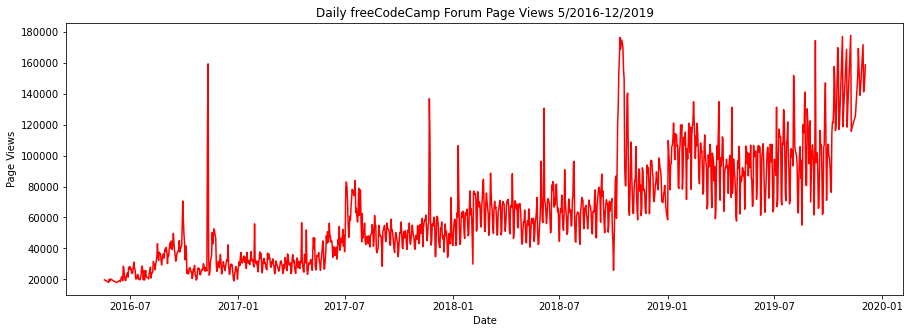

In [4]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index,df['value'],'r')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.plot()

Text(0.5, 1.0, 'Months')

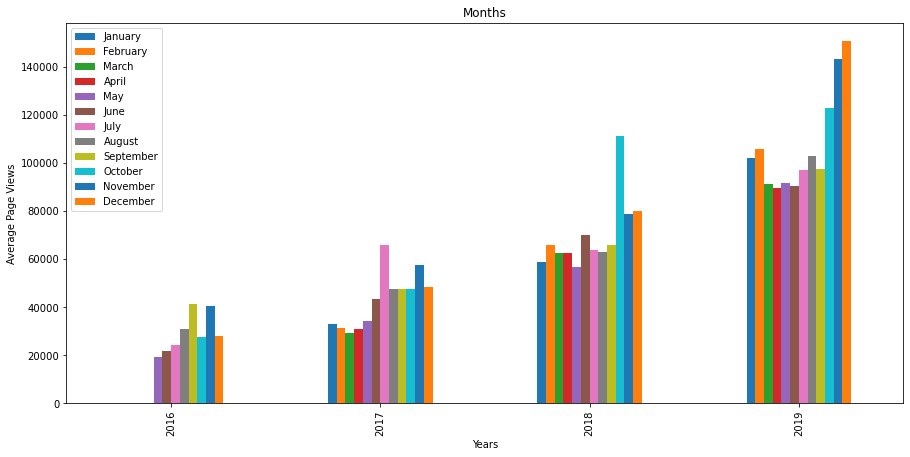

In [5]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
df_bar = df.copy()
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

fig=df_bar.plot.bar(legend=True, figsize=(15,7)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Months')

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

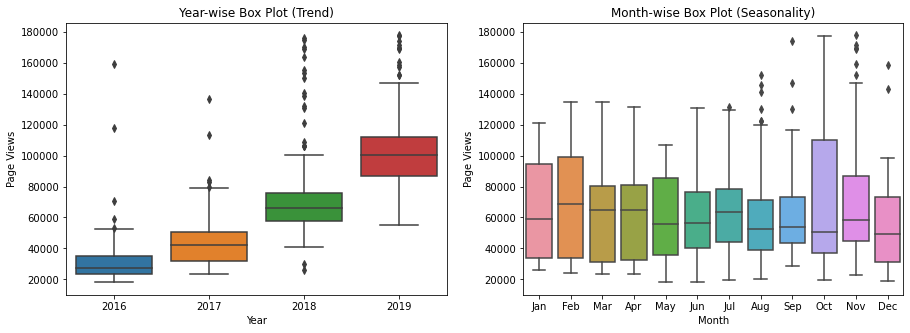

In [8]:
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    
    axes[0]=sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[1]=sns.boxplot(x='month', y='value', data=df_box, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=axes[1])
    
    axes[0].set(xlabel='Year', ylabel='Page Views',title='Year-wise Box Plot (Trend)')
    axes[1].set(xlabel='Month', ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')

### That's all! If you did it in a different way, please feel free to share